$\newcommand{\TirName}[1]{\text{#1}}
\newcommand{\inferrule}[3][]{
  \let\and\qquad
  \begin{array}{@{}l@{}}
  \TirName{#1}
  \\
  \displaystyle
  \frac{#2}{#3}
  \end{array}
}
\newcommand{\infer}[3][]{\inferrule[#1]{#2}{#3}}
$

# Meeting 14 - Evaluation Order

Bor-Yuh Evan Chang  
Thursday, October 10, 2024

<!-- 3 Expressions -->

<!-- 4 Binding and Scope -->

<!-- 8 Recursion -->

<!-- 9 Inductive Data Types -->

<!-- 11 Concrete Syntax -->

<!-- 12 Abstract Syntax and Parsing -->

<!-- 13 Exercise: Syntax -->

<!-- 14 Static Scoping -->

<!-- 15 Judgments -->

<!-- 16 Variables, Basic Values, and Judgments Lab -->

<!-- 18 Operational Semantics -->

<!-- 19 Functions and Dynamic Scoping -->

<!-- 20 Big-Step Exercise -->

<!-- 21 Evaluation Order  -->

<!-- Static Typing -->

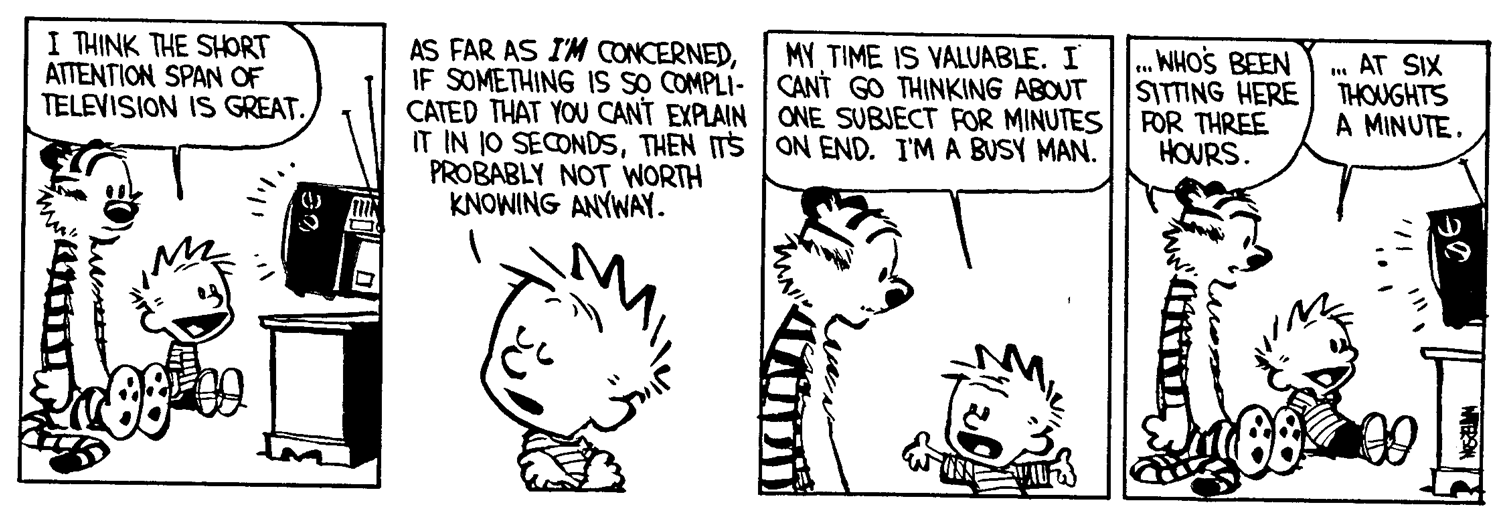

What questions does your neighbor have?

## Links

[ In-Class Slides](in-class/meeting14-evaluation-order.pdf)<br/> [
In-Class Jupyter](in-class/meeting14-evaluation-order.ipynb)<br/> [ Book
Chapter](https://csci3155.cs.colorado.edu/pppl-course/book/evaluation-order.html)

## Announcements

-   Lab 3 due Tuesday 6pm
-   Accelerated section enrollment
-   Passive lecture vs. active learning format

## Today

-   [Evaluation
    Order](https://csci3155.cs.colorado.edu/pppl-course/book/evaluation-order.html)
    (mini-lecture)
-   Preview Lab 3
-   Triage Your Questions
    -   Lab 3?

## Questions?

-   Preview:
    -   What is evaluation order and short-circuit evaluation?

## Questions?

## Evaluation

Consider generic binary operator `#` and `$`. What does

    1 # 2 # 3 $ 4

evaluate to?

Two issues:

-   Syntactic concern: precedence and associativity
-   Semantic concern: operand evaluation order: left-to-right,
    right-to-left, or something else

Does evaluation order matter? Without side-effects, it doesn’t. Called
*referential transparency*.

## Small-Step Operational Semantics

$$
e \longrightarrow e'
$$

Expression $e$ can take one step of evaluation to expression $e'$.

-   Defined on *closed* expressions $e$.
-   Eagerly apply the environment with *substitution*.
-   Using environments or not is an orthogonal concern.

$$
\texttt{const one = 1; one + one} \quad\longrightarrow\quad \texttt{1 + 1}
$$

## Do Something

$\inferrule[DoNeg]{
  n' = - n_1
}{
  \mathop{\texttt{-}} n_1 \longrightarrow n'
}$

$\inferrule[DoPlus]{
  n' = n_1 + n_2
}{
  n_1 \mathbin{\texttt{+}} n_2 \longrightarrow n'
}$

## Search for Something to Do

$\inferrule[SearchNeg]{
  e_1 \longrightarrow e_1'
}{
  \mathop{\texttt{-}} e_1 \longrightarrow\mathop{\texttt{-}} e_1'
}$

$\inferrule[SearchPlus1]{
  e_1 \longrightarrow e_1'
}{
  e_1 \mathbin{\texttt{+}} e_2 \longrightarrow e_1' \mathbin{\texttt{+}} e_2
}$

$\inferrule[SearchPlus2]{
  e_2 \longrightarrow e_2'
}{
  n_1 \mathbin{\texttt{+}} e_2 \longrightarrow n_1 \mathbin{\texttt{+}} e_2'
}$

## Implementation

In [2]:
trait Expr // e
trait Uop  // uop
trait Bop  // bop

case class Unary(uop: Uop, e1: Expr) extends Expr            // e ::= uop e1
case class Binary(bop: Bop, e1: Expr, e2: Expr) extends Expr // e ::= e1 bop e2

case class N(n: Double) extends Expr // e ::= n
case object Neg extends Uop          // uop ::= -
case object Plus extends Bop         // bop ::= +

defined trait Expr 
defined trait Uop 
defined trait Bop 
defined class Unary 
defined class Binary 
defined class N 
defined object Neg 
defined object Plus

In [3]:
def isValue(e: Expr): Boolean = e match {
  case N(_) => true
  case _ => false
}

defined function isValue

In [4]:
val e_oneplustwoplusthreeplusfour = Binary(Plus, Binary(Plus, N(1), N(2)), Binary(Plus, N(3), N(4)))

e_oneplustwoplusthreeplusfour : Binary = Binary (
 bop = Plus,
 e1 = Binary (bop = Plus, e1 = N (n = 1.0 ), e2 = N (n = 2.0 )),
 e2 = Binary (bop = Plus, e1 = N (n = 3.0 ), e2 = N (n = 4.0 ))
)

In [5]:
def step(e: Expr): Expr = {
  require(!isValue(e))
  ???
}

defined function step

## Derivation

In [6]:
e_oneplustwoplusthreeplusfour
val e_step_oneplustwoplusthreeplus = step(e_oneplustwoplusthreeplusfour)

Calling `step(e_oneplustwoplusthreeplusfour)` corresponds to a witness
of the judgment

$$
 (1 \mathbin{\texttt{+}} 2)  \mathbin{\texttt{+}}  (3 \mathbin{\texttt{+}} 4)  \longrightarrow 3  \mathbin{\texttt{+}}  (3 \mathbin{\texttt{+}} 4) 
$$

In [7]:
def step(e: Expr): Expr = {
  require(!isValue(e))
  val e_ = e match {
     // DoNeg
    case Unary(Neg, N(n1)) => {
      println("------------------------------------------------ DoNeg")
      N(-n1)
    }
    // SearchNeg
    case Unary(Neg, e1) => {
      println("------------------------------------------------ SearchNeg")
      Unary(Neg, step(e1))
    }
    // DoPlus
    case Binary(Plus, N(n1), N(n2)) => {
      println("------------------------------------------------ DoPlus")
      N(n1 + n2)
    }
    // SearchPlus2
    case Binary(Plus, N(n1), e2) => {
      val e2_ = step(e2)
      println("------------------------------------------------ SearchPlus2")
      Binary(Plus, N(n1), e2_)
    }
    // SearchPlus1
    case Binary(Plus, e1, e2) => {
      val e1_ = step(e1)
      println("------------------------------------------------ SearchPlus1")
      Binary(Plus, e1_, e2)
    }
  }
  println(s"$e ---> $e_")
  e_
}

step(e_oneplustwoplusthreeplusfour)

------------------------------------------------ DoPlus
Binary(Plus,N(1.0),N(2.0)) ---> N(3.0)
------------------------------------------------ SearchPlus1
Binary(Plus,Binary(Plus,N(1.0),N(2.0)),Binary(Plus,N(3.0),N(4.0))) ---> Binary(Plus,N(3.0),Binary(Plus,N(3.0),N(4.0)))

defined function step 
 res5_1 : Expr = Binary (
 bop = Plus,
 e1 = N (n = 3.0 ),
 e2 = Binary (bop = Plus, e1 = N (n = 3.0 ), e2 = N (n = 4.0 ))
)

## Dynamic Typing

$$
\begin{array}{rrrl}
\text{values} & v& \mathrel{::=}& n\mid b
\end{array}
$$

In [8]:
case class B(b: Boolean) extends Expr // e ::= b

defined class B

In [9]:
def isValue(e: Expr): Boolean = e match {
  case N(_) | B(_) => true
  case _ => false
}

defined function isValue

In [10]:
val e_true = B(true)
val e_trueplustwo = Binary(Plus, e_true, N(2))

e_true : B = B (b = true)
 e_trueplustwo : Binary = Binary (bop = Plus, e1 = B (b = true), e2 = N (n = 2.0 ))

$$
\begin{array}{rrrl}
\text{step-results} & r& \mathrel{::=}& \mathop{\mathsf{typeerror}}e \mid e'
\end{array}
$$

In [11]:
case class DynamicTypeError(e: Expr)         // typeerror e
type Result = Either[DynamicTypeError, Expr] // r ::= typeerror e | e

defined class DynamicTypeError 
defined type Result

## Type Error: Neg

$$
\fbox{$e \longrightarrow r$}
$$

$\inferrule[DoNeg]{
}{
  \mathop{\texttt{-}} n_1 \longrightarrow- n_1
}$

$\inferrule[TypeErrorNeg]{
  v_1 \neq n_1
}{
   \mathop{\texttt{-}} n_1  \longrightarrow \mathop{\mathsf{typeerror}}(\mathop{\texttt{-}} n_1) 
}$

$\inferrule[SearchNeg]{
  e_1 \longrightarrow e_1'
}{
  \mathop{\texttt{-}} e_1 \longrightarrow\mathop{\texttt{-}} e_1'
}$

## Type Error: Plus

$\inferrule[DoPlus]{
}{
  n_1 \mathbin{\texttt{+}} n_2 \longrightarrow n_1 + n_2
}$

$\inferrule[TypeErrorPlus2]{
  v_2 \neq n_2
}{
   n_1 \mathbin{\texttt{+}} v_2  \longrightarrow \mathop{\mathsf{typeerror}}(n_1 \mathbin{\texttt{+}} v_2) 
}$

$\inferrule[SearchPlus2]{
  e_2 \longrightarrow e_2'
}{
  n_1 \mathbin{\texttt{+}} e_2 \longrightarrow n_1 \mathbin{\texttt{+}} e_2'
}$

$\inferrule[TypeErrorPlus1]{
  v_1 \neq n_1
}{
   v_1 \mathbin{\texttt{+}} e_2  \longrightarrow \mathop{\mathsf{typeerror}}(v_1 \mathbin{\texttt{+}} e_2) 
}$

$\inferrule[SearchPlus1]{
  e_1 \longrightarrow e_1'
}{
  e_1 \mathbin{\texttt{+}} e_2 \longrightarrow e_1' \mathbin{\texttt{+}} e_2
}$

$\inferrule[PropagateNeg]{
   e_1  \longrightarrow \mathop{\mathsf{typeerror}}e 
}{
   \mathop{\texttt{-}} e_1  \longrightarrow \mathop{\mathsf{typeerror}}e 
}$

$\inferrule[PropagatePlus2]{
   e_2  \longrightarrow \mathop{\mathsf{typeerror}}e 
}{
   n_1 \mathbin{\texttt{+}} e_2  \longrightarrow \mathop{\mathsf{typeerror}}e 
}$

$\inferrule[PropagatePlus1]{
   e_1  \longrightarrow \mathop{\mathsf{typeerror}}e 
}{
   e_1 \mathbin{\texttt{+}} e_2  \longrightarrow \mathop{\mathsf{typeerror}}e 
}$

## Implementation

In [12]:
def step(e: Expr): Either[DynamicTypeError, Expr] = {
  require(!isValue(e))
  ???
}

defined function step

``` scala
def step(e: Expr): Either[DynamicTypeError, Expr] = {
  require(!isValue(e))
  e match {
    // DoNeg
    case Unary(Neg, N(n1)) => Right(N(-n1))
    // TypeErrorNeg
    case Unary(Neg, v1) if isValue(v1) => Left(DynamicTypeError(e))
    case Unary(Neg, e1) => step(e1) match {
      // SearchNeg
      case Right(e1) => Right(Unary(Neg, e1))
      // PropagateNeg
      case Left(error) => Left(error)
    }
    case Binary(Plus, N(n1), v2) if isValue(v2) => v2 match {
      // DoPlus
      case N(n2) => Right(N(n1 + n2))
      // TypeErrorPlus2
      case _ => Left(DynamicTypeError(e))
    }
    case Binary(Plus, v1, e2) if isValue(v1) => v1 match {
      case N(n1) => step(e2) match {
        // SearchPlus2
        case Right(e2) => Right(Binary(Plus, N(n1), e2))
        // PropagatePlus2
        case Left(error) => Left(error)
      }
      // TypeErrorPlus1
      case _ => Left(DynamicTypeError(e))
    }
    case Binary(Plus, e1, e2) => step(e1) match {
      // SearchPlus1
      case Right(e1) => Right(Binary(Plus, e1, e2))
      // PropagatePlus1
      case Left(error) => Left(error)
    }
  }
}
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">step</span></pre>

``` scala
def step(e: Expr): Either[DynamicTypeError, Expr] = {
  require(!isValue(e))
  e match {
    // DoNeg
    case Unary(Neg, N(n1)) => Right(N(-n1))
    // TypeErrorNeg
    case Unary(Neg, v1) if isValue(v1) => Left(DynamicTypeError(e))
    // SearchNeg and PropagateNeg
    case Unary(Neg, e1) => step(e1) map { e1 => Unary(Neg, e1) }
    case Binary(Plus, N(n1), v2) if isValue(v2) => v2 match {
      // DoPlus
      case N(n2) => Right(N(n1 + n2))
      // TypeErrorPlus2
      case _ => Left(DynamicTypeError(e))
    }
    case Binary(Plus, v1, e2) if isValue(v1) => v1 match {
      // SearchPlus2 and PropagatePlus2
      case N(n1) => step(e2) map { e2 => Binary(Plus, N(n1), e2)  }
      // TypeErrorPlus1
      case _ => Left(DynamicTypeError(e))
    }
    // SearchPlus1 and PropagatePlus1
    case Binary(Plus, e1, e2) => step(e1) map { e1 => Binary(Plus, e1, e2) }
  }
}
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">step</span></pre>

## Short-Circuiting Evaluation

$\inferrule[SearchBinary1]{
  e_1 \longrightarrow e_1'
}{
  e_1 \mathbin{\mathit{bop}}e_2 \longrightarrow e_1' \mathbin{\mathit{bop}}e_2
}$

$\inferrule[SearchBinary2]{
  e_2 \longrightarrow e_2'
}{
  v_1 \mathbin{\mathit{bop}}e_2 \longrightarrow v_1 \mathbin{\mathit{bop}}e_2'
}$

$\inferrule[DoAndTrue]{
  v_1 \rightsquigarrow \mathbf{true}
}{
  v_1 \mathbin{\texttt{\&\&}} e_2 \longrightarrow e_2
}$

$\inferrule[DoAndFalse]{
  v_1 \rightsquigarrow \mathbf{false}
}{
  v_1 \mathbin{\texttt{\&\&}} e_2 \longrightarrow v_1
}$

$\inferrule[DoOrTrue]{
  v_1 \rightsquigarrow \mathbf{true}
}{
  v_1 \mathbin{\texttt{||}} e_2 \longrightarrow v_1
}$

$\inferrule[DoOrFalse]{
  v_1 \rightsquigarrow \mathbf{false}
}{
  v_1 \mathbin{\texttt{||}} e_2 \longrightarrow e_2
}$

## Variables

$\inferrule[DoConstDecl]{
}{
  \mathbf{const}\;x\;\texttt{=}\;v_1\texttt{;}\;e_2 \longrightarrow {}[v_1/x]e_2 
}$

$\inferrule[SearchConstDecl]{
  e_1 \longrightarrow e_1'
}{
  \mathbf{const}\;x\;\texttt{=}\;e_1\texttt{;}\;e_2 \longrightarrow\mathbf{const}\;x\;\texttt{=}\;e_1'\texttt{;}\;e_2
}$

## Substitution

Shadowing $$
[\underbrace{\texttt{2}}_{e_1} /\underbrace{\texttt{a}}_{x} ]
\underbrace{(\texttt{const a = 1; a + b})}_{e_2}
= (\texttt{const a = 1; a + b})
$$

Free-Variable Capture

$$
[\underbrace{\texttt{(a + 2)}}_{e_1} /\underbrace{\texttt{b}}_{x} ]
\underbrace{(\texttt{const a = 1; a + b})}_{e_2}
= (\texttt{const c = 1; c + (a + 2)})
$$